In [1]:
# https://www.w3schools.com/colors/colors_palettes.asp
# https://stackoverflow.com/questions/49429585/how-to-change-the-background-color-of-a-single-cell-in-a-jupyter-notebook-jupy#comment104601184_50824920
from IPython.core.magic import register_cell_magic
from IPython.display import HTML, display
my_palette = ['#edc6a3','#f4ce88','#f0e9ee','#cbcfd9','#c9dac7','#d1d3be','#efe1d5','#e6b4a7','#c0b6a2','#cdb090']
my_palette_names = {'getter':'#e6b4a7', 'init':'#efe1d5'} 
@register_cell_magic
def bgc(color, cell=None):
    if str.isdigit(color) and len(color) == 1:
        color = my_palette[int(color)]
    else:
        color = my_palette_names.get(color, color)
    script = ("var cell = this.closest('.code_cell');"
    "var editor = cell.querySelector('.input_area');"
    "editor.style.background='{}';"
    "this.parentNode.removeChild(this)").format(color) 
    display(HTML('<img src onerror="{}">'.format(script)))

██████████████████████████████████████████

In [297]:
#%%bgc #FFB7B2

#Model
import agentpy as ap
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython
import ipysimulate as ips
from ipywidgets import AppLayout

t =  0


AttributeError: 'PathCollection' object has no property 'size'

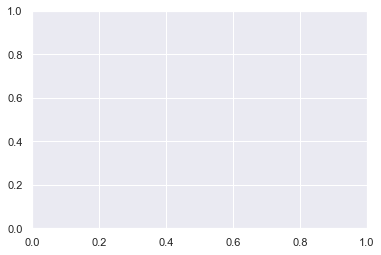

In [359]:
#%%bgc #fbd6d7
def animation_plot(model, ax):
    ax.set_title(f"Foraging model \n Time-step: {model.t}")
    print("t = ", model.t)
    pos = model.space.positions.values()
    pos = np.array(list(pos)).T  # Transform
    #ax.scatter(*pos, s=2, c='green')# all green
    #ax.scatter(*pos, s=2, color=plt.scatter.cmap(0.7)) #didn't work
    colorlist = ['green', 'red', 'pink', 'cyan']
    for group in [model47.bees, model47.resources, model47.hive]:
        #ax.scatter(*pos, s=2, c = colorlist[0])
        plt.scatter(*pos, size =2, c = colorlist[0])
        colorlist = colorlist[1:]
    ax.set_xlim(0, model.p.land_size)
    ax.set_ylim(0, model.p.land_size)
    
fig, ax = plt.subplots()
model47 = ForagingModel(parameters)
animation = ap.animate(model47, fig, ax, animation_plot)
IPython.display.HTML(animation.to_jshtml())

In [353]:
colorlist = ['green', 'red', 'orange', 'cyan']
for i in [1,2,3,4]:
    print (colorlist[0])
    colorlist = colorlist[1:]

green
red
orange
cyan


In [342]:
#%%bgc #faeade
model47 = ForagingModel(parameters)
control = ips.Control(mod, parameters, ('t'))
scatterplot = ips.Scatterplot(
    control,
    xy=lambda m: m.space.positions.values(),
    c=lambda m: m.agents.kind
)
AppLayout(left_sidebar=control,
          center=scatterplot,
          pane_widths=['525px', 1, 1],
          height='500px')

AppLayout(children=(Control(layout=Layout(grid_area='left-sidebar'), parameters={'population': 500, 'steps': 1…

Exception in thread Thread-26:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/opt/anaconda3/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.7/site-packages/ipysimulate/control.py", line 221, in run_simulation
    self.run_step()
  File "/opt/anaconda3/lib/python3.7/site-packages/ipysimulate/control.py", line 202, in run_step
    self.model.sim_step()
  File "/opt/anaconda3/lib/python3.7/site-packages/agentpy/model.py", line 318, in sim_step
    self.step()
  File "<ipython-input-305-fd029f76adcd>", line 47, in step
    searching_bees.search()
  File "/opt/anaconda3/lib/python3.7/site-packages/agentpy/sequences.py", line 85, in __call__
    return [func_obj(*args, **kwargs) for func_obj in self]
  File "/opt/anaconda3/lib/python3.7/site-packages/agentpy/sequences.py", line 85, in <listcomp>
    return [func_obj(*args

██████████████████████████████████████████

In [329]:
#%%bgc #FFDAC1
#model47 = ForagingModel(parameters) 

class Bee(ap.Agent):
    """ A forager from the colony """
    
    def setup(self):  
        """ Initialize variables at agent creation """
        self.Model = model47
        self.kind = "bee"
        
        self.orientation = model.nprandom.uniform(low = 0.0, high = 360.0) 
        # direction the bee is facing in degrees, East (to the right) is 0º
        
        self.state = "inactive" 
        self.time_searching = 0 # Counter of how many ticks the bee was in the "searching" state
        self.time_foraging = 0 # Counter of how many ticks the bee was in the "foraging" state
        self.time_returning = 0 # Counter of how many ticks the bee was in the "returning" state
        # Possible states:
        #   "inactive": at the hive
        #   "searching": random foraging
        #   "foraging": found a resource
        #   "returning": en route back to the hive

    def setup_pos(self, space):
        """Make continuous environment"""
        self.space = space 
        self.neighbors = space.neighbors
        self.pos = space.positions[self]
        
    def move_radially(self, agent, move_dist, move_angle):
        """
        Movement defined by a distance and angle
        Angle is relative to the direction the bee is currently pointed in
        """
        global_angle = agent.orientation + move_angle
        current_x = agent.pos[0]
        current_y = agent.pos[1]
        new_x = current_x + move_dist * np.cos(global_angle)
        new_y = current_y + move_dist * np.sin(global_angle)
        self.pos = [new_x,new_y]
        #print("agent: ", agent)
        #print("self.Model.space.positions[agent]: ", self.Model.space.positions[agent])
        #print("self.Model.space.positions[agent][...]", self.Model.space.positions[agent][...])
        self.Model.space.move_to(self, self.pos) #I think this should do what we want

    def which_resources_found(self, agent):
        self.on_resource = []
        for r in self.model.resources:
            #if in bounding box's range of x values...
            if r.range_x[0] <= self.pos[0] <= r.range_x[1]:
                #if ALSO in bounding box's range of y values...
                if r.range_y[0] <= self.pos[1] <= r.range_y[1]:
                    # if bee within the plant's radius of the center
                    dist_to_resource = np.sqrt(abs((r.pos[0]-self.pos[0])**2 + (r.pos[1]-self.pos[1])**2))
                    if dist_to_resource <= r.radius:
                        self.on_resource += [r.id] #add to list of resources the bee is on
        return self.on_resource
    
    def dist_btwn(self, coordsA, coordsB):
        x1 = coordsA[0]
        x2 = coordsB[0]
        y1 = coordsA[1]
        y2 = coordsB[1]
        return np.sqrt((x1-x2)**2+(y1-y2)**2)
        
    
    def be_inactive(self):
        """ What the inactive bees do that timestep """
        #self.pos = self.space.positions[self]
        
        
        rg = self.model.random  # Random number generator

        if self.p.p_random_forage > rg.random():
            self.time_searching = 0 # Reset time searching counter
            self.state = "searching"

    ################################################
            
    def search(self):
        """ What the searching bees do that timestep """
        #self.pos = self.space.positions[self]
        
        #Randomly choose direction and distance
        move_dist = model.nprandom.uniform(low = 0.0, high = self.p.dist_per_tick)
        move_angle = model.nprandom.uniform(low = -45, high = 45)
        self.move_radially(self, move_dist, move_angle)
        
        self.time_searching += 1 # add 1 tick to the time searching
        resources_found = self.which_resources_found(self)
        
        if resources_found != []: #if found resource, foraging
            self.state = "foraging"
        elif self.time_searching >= self.p.give_up_threshold:
            self.state = "returning"
        else: 
            self.state = "searching"

    ################################################
            
    def forage(self):
        """ What the foraging bees do that timestep """
        #self.pos = self.space.positions[self]
        
        self.time_foraging += 1
        if self.time_foraging >= self.p.ticks_on_resource: #time spent foraging within a patch
            self.time_returning = 0
            self.state = "returning"
    
    ################################################
    
    def go_home(self):
        """ What the returning bees do that timestep """
        #self.pos = self.space.positions[self]
        
        
        current_x = self.pos[0] #self.positions[agent][0]
        current_y = self.pos[1]

        if self.dist_btwn(self.pos, [self.p.land_size/2, self.p.land_size/2]) <= self.p.dist_per_tick:
            #if within one step of the hive, go there
            self.pos = [self.p.land_size/2,self.p.land_size/2]
            self.Model.space.move_to(self, self.pos)
            self.state = "inactive"
        else:
            #NEED TO CHANGE TO REFLECT NON-ORIGIN HIVE POSITION
            x_dif = abs(current_x - self.p.land_size/2) #difference between bee's x pos and the hive's x pos
            y_dif = abs(current_y - self.p.land_size/2)
            global_angle = np.degrees(np.arctan(y_dif / x_dif)) #Find angle to the hive
            #need to make sure the positive / negative is right!!!!
            move_angle = global_angle - self.orientation # correct for bees current orientation
            self.move_radially(self, self.p.dist_per_tick, move_angle)


██████████████████████████████████████████

In [330]:
#%%bgc #E2F0CB

class Resource(ap.Agent):
    """ A patch of flowering plants, represented by a circle"""
    
    def setup(self):  
        """ Initialize a new variable at agent creation """
        self.radius = self.p.radius
        self.kind = "resource"
        
    def setup_pos(self, space):
        self.space = space 
        self.neighbors = space.neighbors 
        self.pos = space.positions[self]
        
        self.range_x = (self.pos[0] - self.radius, self.pos[0] + self.radius)
        self.range_y = (self.pos[1] - self.radius, self.pos[1] + self.radius)

██████████████████████████████████████████

In [341]:
#%%bgc #B5EAD7

class Hive(ap.Agent):
    """ A patch of flowering plants, represented by a circle"""
    
    def setup(self):  
        """ Initialize a new variable at agent creation """
        self.pos = self.coords = (self.p.land_size/2,self.p.land_size/2)
        self.kind = "hive"

██████████████████████████████████████████

In [332]:
#%%bgc #C7CEEA

class ForagingModel(ap.Model):
    """ Agent-based model that simulates a very 
    simplified version of bee foraging behavior """

    def setup(self):
        """ Initialize the agents"""
        
        #Create ground
        self.space = ap.Space(self, shape=[self.p.land_size]*2, Torus = False)
        
        # Create flowering plants
        self.resources = ap.AgentList(self, self.p.n_resources, Resource)
        self.space.add_agents(self.resources, random=True)
        self.resources.setup_pos(self.space)
        
        #Create hive
        self.hive= ap.AgentList(self, 1, Hive)
        self.space.add_agents(self.hive, [(self.p.land_size/2,self.p.land_size/2)], random=False)
        
        # Create bees
        self.bees = ap.AgentList(self, self.p.population, Bee)
        self.space.add_agents(self.bees, [[self.p.land_size/2,self.p.land_size/2]]*self.p.population , random=False) 
        self.bees.setup_pos(self.space)
        
        self.agents = self.bees + self.hive+ self.resources #not sure if this allowed
        
    def update(self):  
        """ Record variables after setup and each step. """
        for s in ["inactive", "searching", "foraging", "returning"]:
            n_agents = len(self.bees.select(self.bees.state == s))
            self[s] = n_agents / self.p.population 
            self.record(s)

    def step(self):   
        """ Define the models' events per simulation step. """
        
        #Organize the bees into agentlists based on their states
        inactive_bees = self.bees.select(self.bees.state == "inactive")
        searching_bees = self.bees.select(self.bees.state == "searching")
        foraging_bees = self.bees.select(self.bees.state == "foraging")
        returning_bees = self.bees.select(self.bees.state == "returning")

        # Have the bees do things based on their states
        inactive_bees.be_inactive()
        searching_bees.search()
        foraging_bees.forage()
        returning_bees.go_home()

    def end(self):     
        """ Record evaluation measures at the end of the simulation. """
        # Record final evaluation measures
        self.report('Max foragers', max(self.log['foraging']))

██████████████████████████████████████████

In [333]:
#%%bgc #dec1ff

def foraging_stackplot(data, ax):
    """ Stackplot of people's condition over time. """
    x = data.index.get_level_values('t')
    y = [data[var] for var in ['inactive', 'searching', 'foraging', 'returning']]

    sns.set()  # Set seaborn theme for colors & lines
    ax.stackplot(x, y, 
                 labels=['Inactive', 'Searching', 'Foraging', 'Returning'],
                 colors = ['r', 'b', 'g', 'y'])    

    ax.legend()
    ax.set_xlim(0, max(1, len(x)-1))
    ax.set_ylim(0, 1)
    ax.set_xlabel("Time steps")
    ax.set_ylabel("Percentage of population")
    plt.show()

██████████████████████████████████████████

Completed: 100 steps
Run time: 0:00:01.282738
Simulation finished


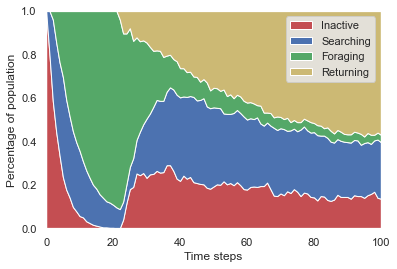

In [319]:
#%%bgc #c9a2ca

parameters = { 
    'population':500, 
    'steps':100,
    'p_random_forage': 0.25,
    'p_abandon_search': 0.05,
    'p_find_food': 0.025,
    'ticks_on_resource': 20,
    'land_size': 50,
    'n_resources': 100,
    'radius': 1,
    'give_up_threshold': 50, #threshold for time outside before giving up
    'dist_per_tick': 5, #distance a bee travels per tick on return to nest
}

#model = ForagingModel(parameters)
results = model47.run() 
fig, ax = plt.subplots()
foraging_stackplot(results.variables.ForagingModel, ax)

██████████████████████████████████████████

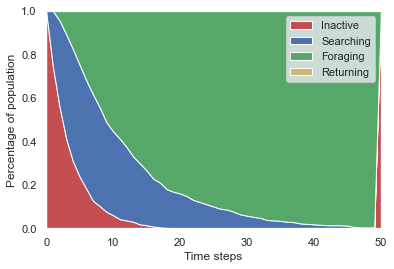

In [289]:
#%%bgc #ecbdd0

fig, ax = plt.subplots()
foraging_stackplot(results.variables.ForagingModel, ax)

██████████████████████████████████████████

In [248]:
#%%bgc #fbd6d7

"""
def animation_plot_single(m, ax):
    ndim = m.p.ndim
    ax.set_title(f"Boids Flocking Model {ndim}D t={m.t}")
    pos = m.space.positions.values()
    pos = np.array(list(pos)).T  # Transform
    ax.scatter(*pos, s=1, c='black')
    ax.set_xlim(0, m.p.size)
    ax.set_ylim(0, m.p.size)
    if ndim == 3:
        ax.set_zlim(0, m.p.size)
    ax.set_axis_off()

def animation_plot(m, p):
    projection = '3d' if p['ndim'] == 3 else None
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111, projection=projection)
    animation = ap.animate(m(p), fig, ax, animation_plot_single)
    return IPython.display.HTML(animation.to_jshtml(fps=20))

animation_plot(BoidsModel, parameters2D)
"""

'\ndef animation_plot_single(m, ax):\n    ndim = m.p.ndim\n    ax.set_title(f"Boids Flocking Model {ndim}D t={m.t}")\n    pos = m.space.positions.values()\n    pos = np.array(list(pos)).T  # Transform\n    ax.scatter(*pos, s=1, c=\'black\')\n    ax.set_xlim(0, m.p.size)\n    ax.set_ylim(0, m.p.size)\n    if ndim == 3:\n        ax.set_zlim(0, m.p.size)\n    ax.set_axis_off()\n\ndef animation_plot(m, p):\n    projection = \'3d\' if p[\'ndim\'] == 3 else None\n    fig = plt.figure(figsize=(7,7))\n    ax = fig.add_subplot(111, projection=projection)\n    animation = ap.animate(m(p), fig, ax, animation_plot_single)\n    return IPython.display.HTML(animation.to_jshtml(fps=20))\n\nanimation_plot(BoidsModel, parameters2D)\n'

██████████████████████████████████████████

In [249]:
#%%bgc #faeade

# def animation_plot(model, ax):
#     ax.set_title(f"Foraging model \n Time-step: {model.t}")
#     print("t = ", model.t)
#     pos = model.space.positions.values()
#     pos = np.array(list(pos)).T  # Transform
#     ax.scatter(*pos, s=2, c='green')
#     ax.set_xlim(0, model.p.land_size)
#     ax.set_ylim(0, model.p.land_size)

fig, ax = plt.subplots()
animation = ap.animate(model47, fig, ax, animation_plot)
IPython.display.HTML(animation.to_jshtml())

t =  50
t =  50
